In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_excel('DIscientomertics.xlsx')

In [3]:
df['DI'] = (df['NG']-df['NR'])/(df['NG']+df['NR']+df['NE'])
df['DI*'] = (df['NG'])/(df['NG']+df['NR']+df['NE'])
df['normDI'] = (df['NG'])/(df['NG']+df['NR']+df['normNE'])

In [4]:
df.dropna(inplace=True)

In [5]:
df = df[df['DI*']>0]

In [6]:
df = df[df['DI*']<1]

In [20]:
df_describe = pd.DataFrame(df.describe()).T
df_describe['var'] = df.var()
df_describe['skewness'] = df.skew()
df_describe['kurtosis'] = df.kurt()
df_describe.to_excel('describe2.0.xlsx')

C:\Users\nd\AppData\Local\Temp\ipykernel_18016\3985308553.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_describe['var'] = df.var()
C:\Users\nd\AppData\Local\Temp\ipykernel_18016\3985308553.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_describe['skewness'] = df.skew()
C:\Users\nd\AppData\Local\Temp\ipykernel_18016\3985308553.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_describe['kurtosis'] = df.kurt()


In [ ]:
df_describe.to_excel()

In [38]:
df_describe

,count,mean,std,min,25%,50%,75%,max,var,skewness,kurtosis
Citation count,3432.0,35.699592,91.748156,1.000000,10.000000,19.000000,37.000000,4191.000000,8.417724e+03,29.121585,1243.152036
sumNG(k=2),3432.0,5.098776,11.784294,0.000000,1.000000,2.000000,5.000000,322.000000,1.388696e+02,10.636273,193.705684
sumNR(k=2),3432.0,6.288462,10.192756,0.000000,1.000000,3.000000,7.000000,167.000000,1.038923e+02,5.208649,46.282765
sumNE(k=2),3432.0,1513.420163,1326.524863,1.000000,482.000000,1175.500000,2233.500000,11552.000000,1.759668e+06,1.451975,3.537922
normalizedNE(k=2),3432.0,27.006503,14.293193,1.000000,19.000000,24.706019,31.995455,139.500000,2.042954e+02,2.103391,8.828970
GDI(k=2),3432.0,0.126776,0.113127,0.010870,0.055752,0.090564,0.154762,0.904478,1.279774e-02,2.419506,7.769410
NG,3432.0,6.485431,13.155320,1.000000,1.000000,3.000000,7.000000,336.000000,1.730625e+02,9.432959,152.532731
NR,3432.0,4.901807,8.301937,0.000000,0.000000,2.000000,6.000000,109.000000,6.892215e+01,4.664429,34.217213
NE,3432.0,274.984266,292.035648,1.000000,62.750000,188.000000,399.000000,4723.000000,8.528482e+04,3.165868,26.840031
normNE,3432.0,28.554090,24.753371,0.666667,11.666667,23.000000,38.000000,391.000000,6.127294e+02,2.917920,20.914271


In [13]:
scipy.stats.pearsonr(df['DI'], df['outdegree'])

(0.16372981405390813, 4.748472272327785e-22)

In [14]:
scipy.stats.pearsonr(df['DI*'], df['outdegree'])

(0.2781417494605931, 5.206796304326065e-62)

In [15]:
scipy.stats.pearsonr(df[r'GDI(k=2)'], df['outdegree'])

(0.5014347766292981, 5.438350131257161e-218)

In [71]:
def getyear(x):
    year = int(x[-4:])
    return year
df['year'] = df['meta_inf'].apply(getyear)

In [82]:
df['bins'] = pd.cut(df['year'],bins = [1978,1989,2000,2011,2022])

In [80]:
year_lst = df['year'].unique()
year_lst.sort()
year_lst

array([1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [75]:
# binn = df['bins'].unique()
# df1 = df[df['bins']==binn[0]]
# df2 = df[df['bins']==binn[1]]
# df2 = df[df['bins']==binn[1]]
# df2 = df[df['bins']==binn[1]]
# df2 = df[df['bins']==binn[1]]
# df3 = df[df['bins']==binn[-1]]

In [83]:
df['bins']

1       (2011, 2022]
2       (2011, 2022]
3       (2011, 2022]
4       (2011, 2022]
5       (2011, 2022]
            ...     
6913    (2011, 2022]
6914    (2011, 2022]
6915    (2011, 2022]
6917    (2011, 2022]
6918    (2011, 2022]
Name: bins, Length: 3432, dtype: category
Categories (4, interval[int64, right]): [(1978, 1989] < (1989, 2000] < (2000, 2011] < (2011, 2022]]

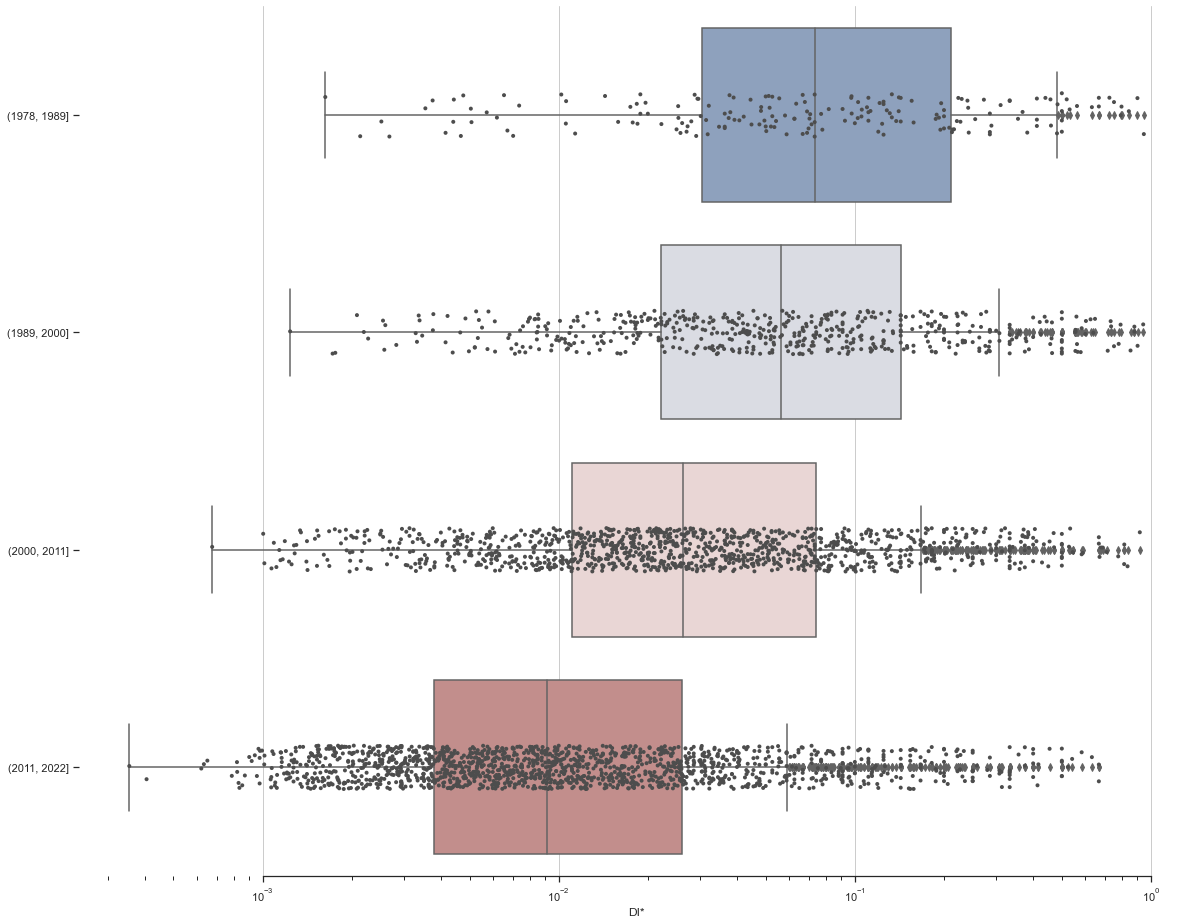

In [90]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(20, 16))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x=r"DI*", y="bins", data=df,
#             whis=[0, 100], width=.6,
            palette="vlag")

# Add in points to show each observation
sns.stripplot(x=r"DI*", y="bins", data=df,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

# Linear regression with marginal distributions

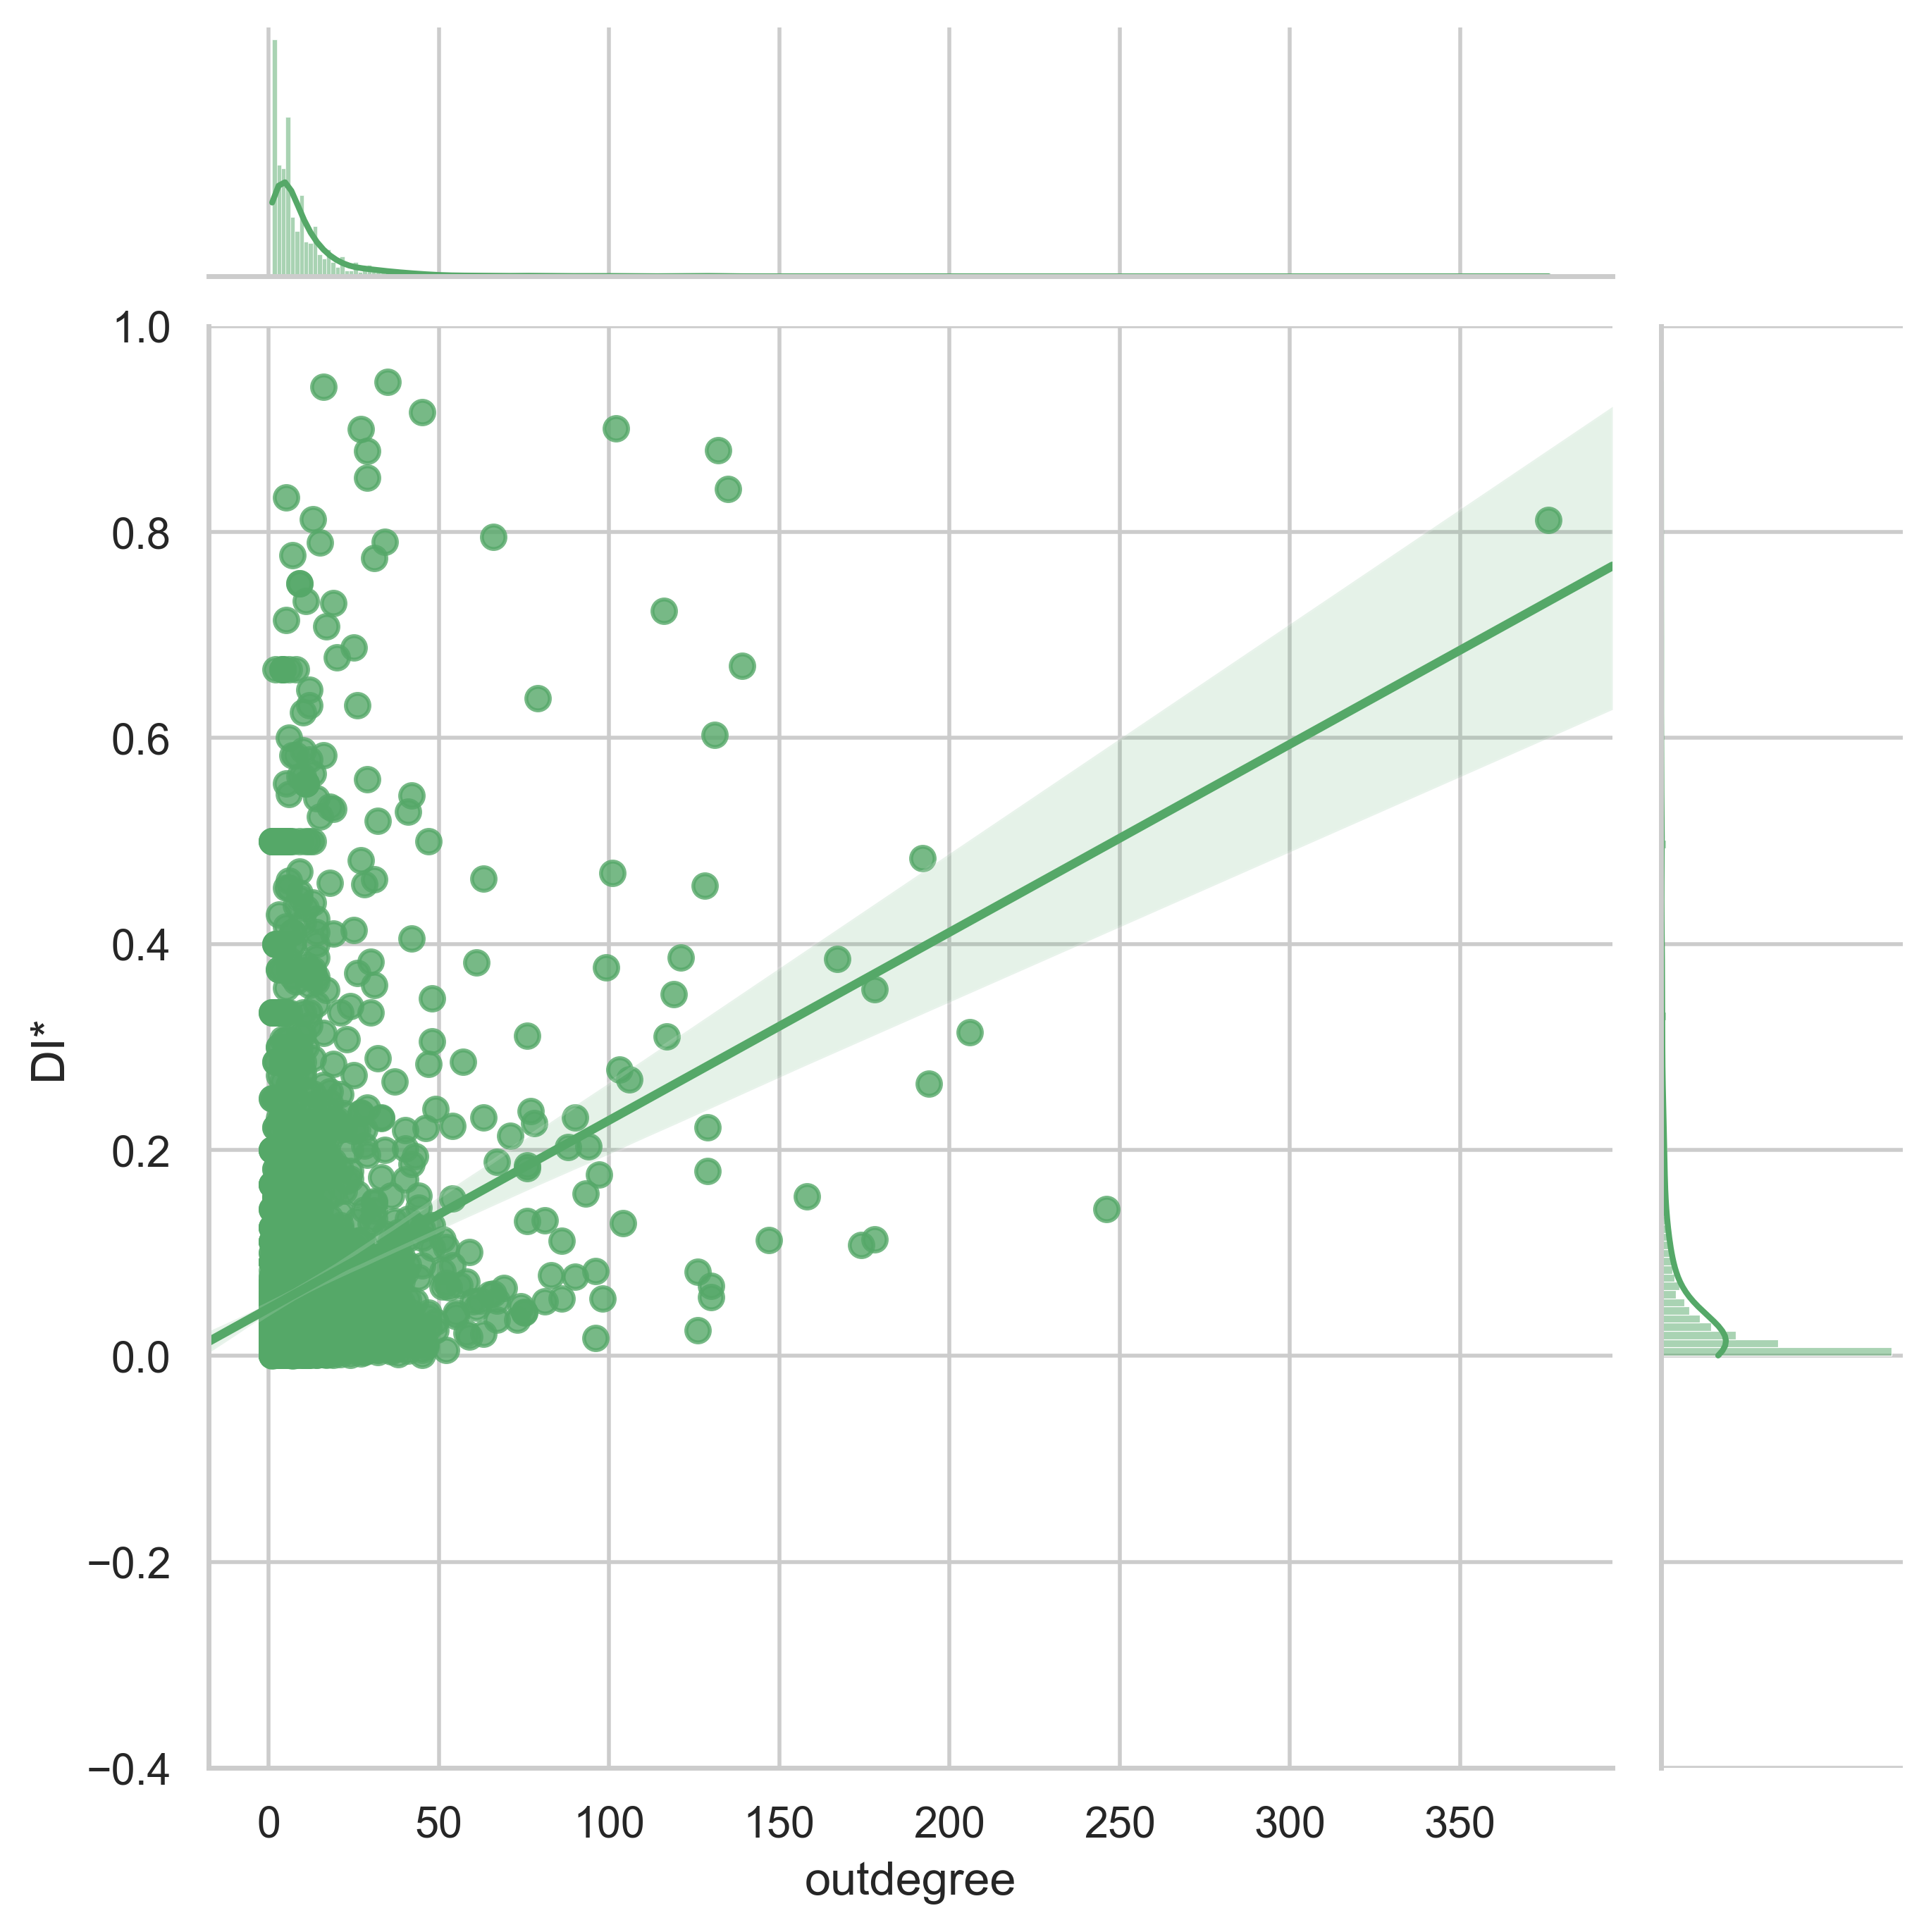

In [17]:
sns.set_theme(style="whitegrid")

g = sns.jointplot(y=r"DI*", x="outdegree", data=df,
                  kind="reg", truncate=False,
                   ylim=(-0.4, 1),
                  color="g", height=7)

g.figure.dpi = 400

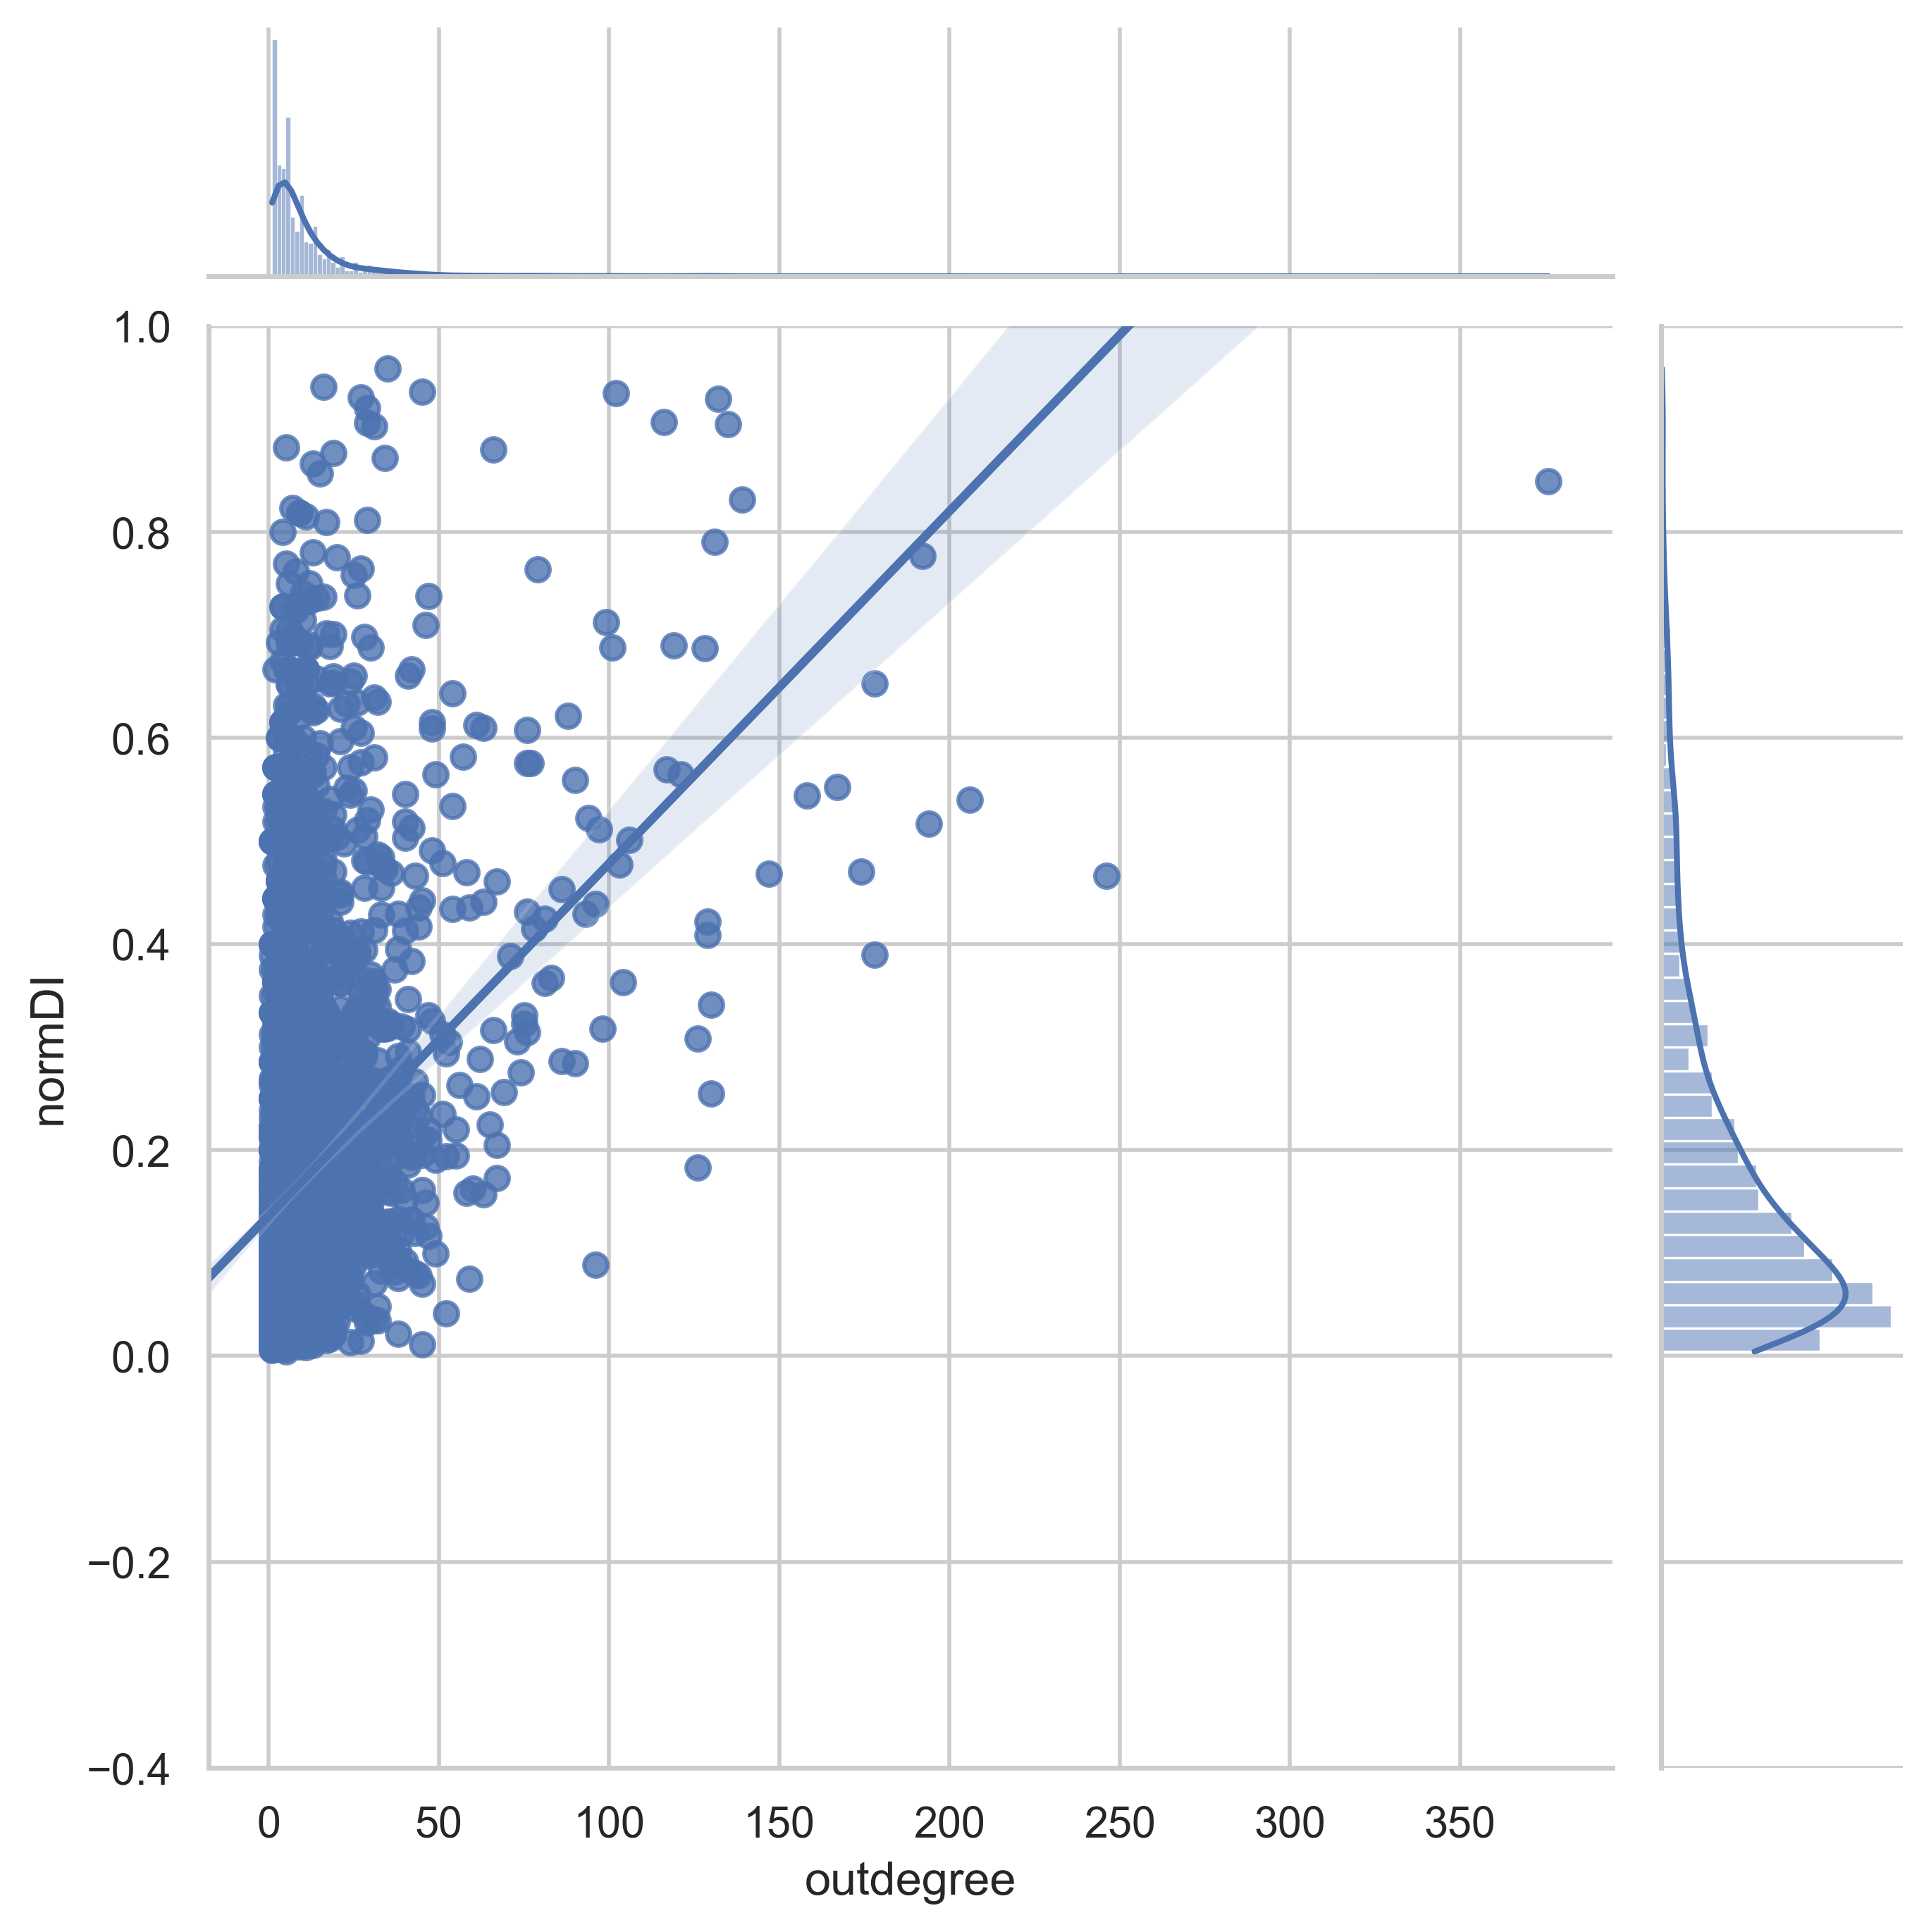

In [62]:
sns.set_theme(style="whitegrid")

g = sns.jointplot(y=r"normDI", x="outdegree", data=df,
                  kind="reg", truncate=False,
                   ylim=(-0.4, 1),
                  color="b", height=7)

g.figure.dpi = 400

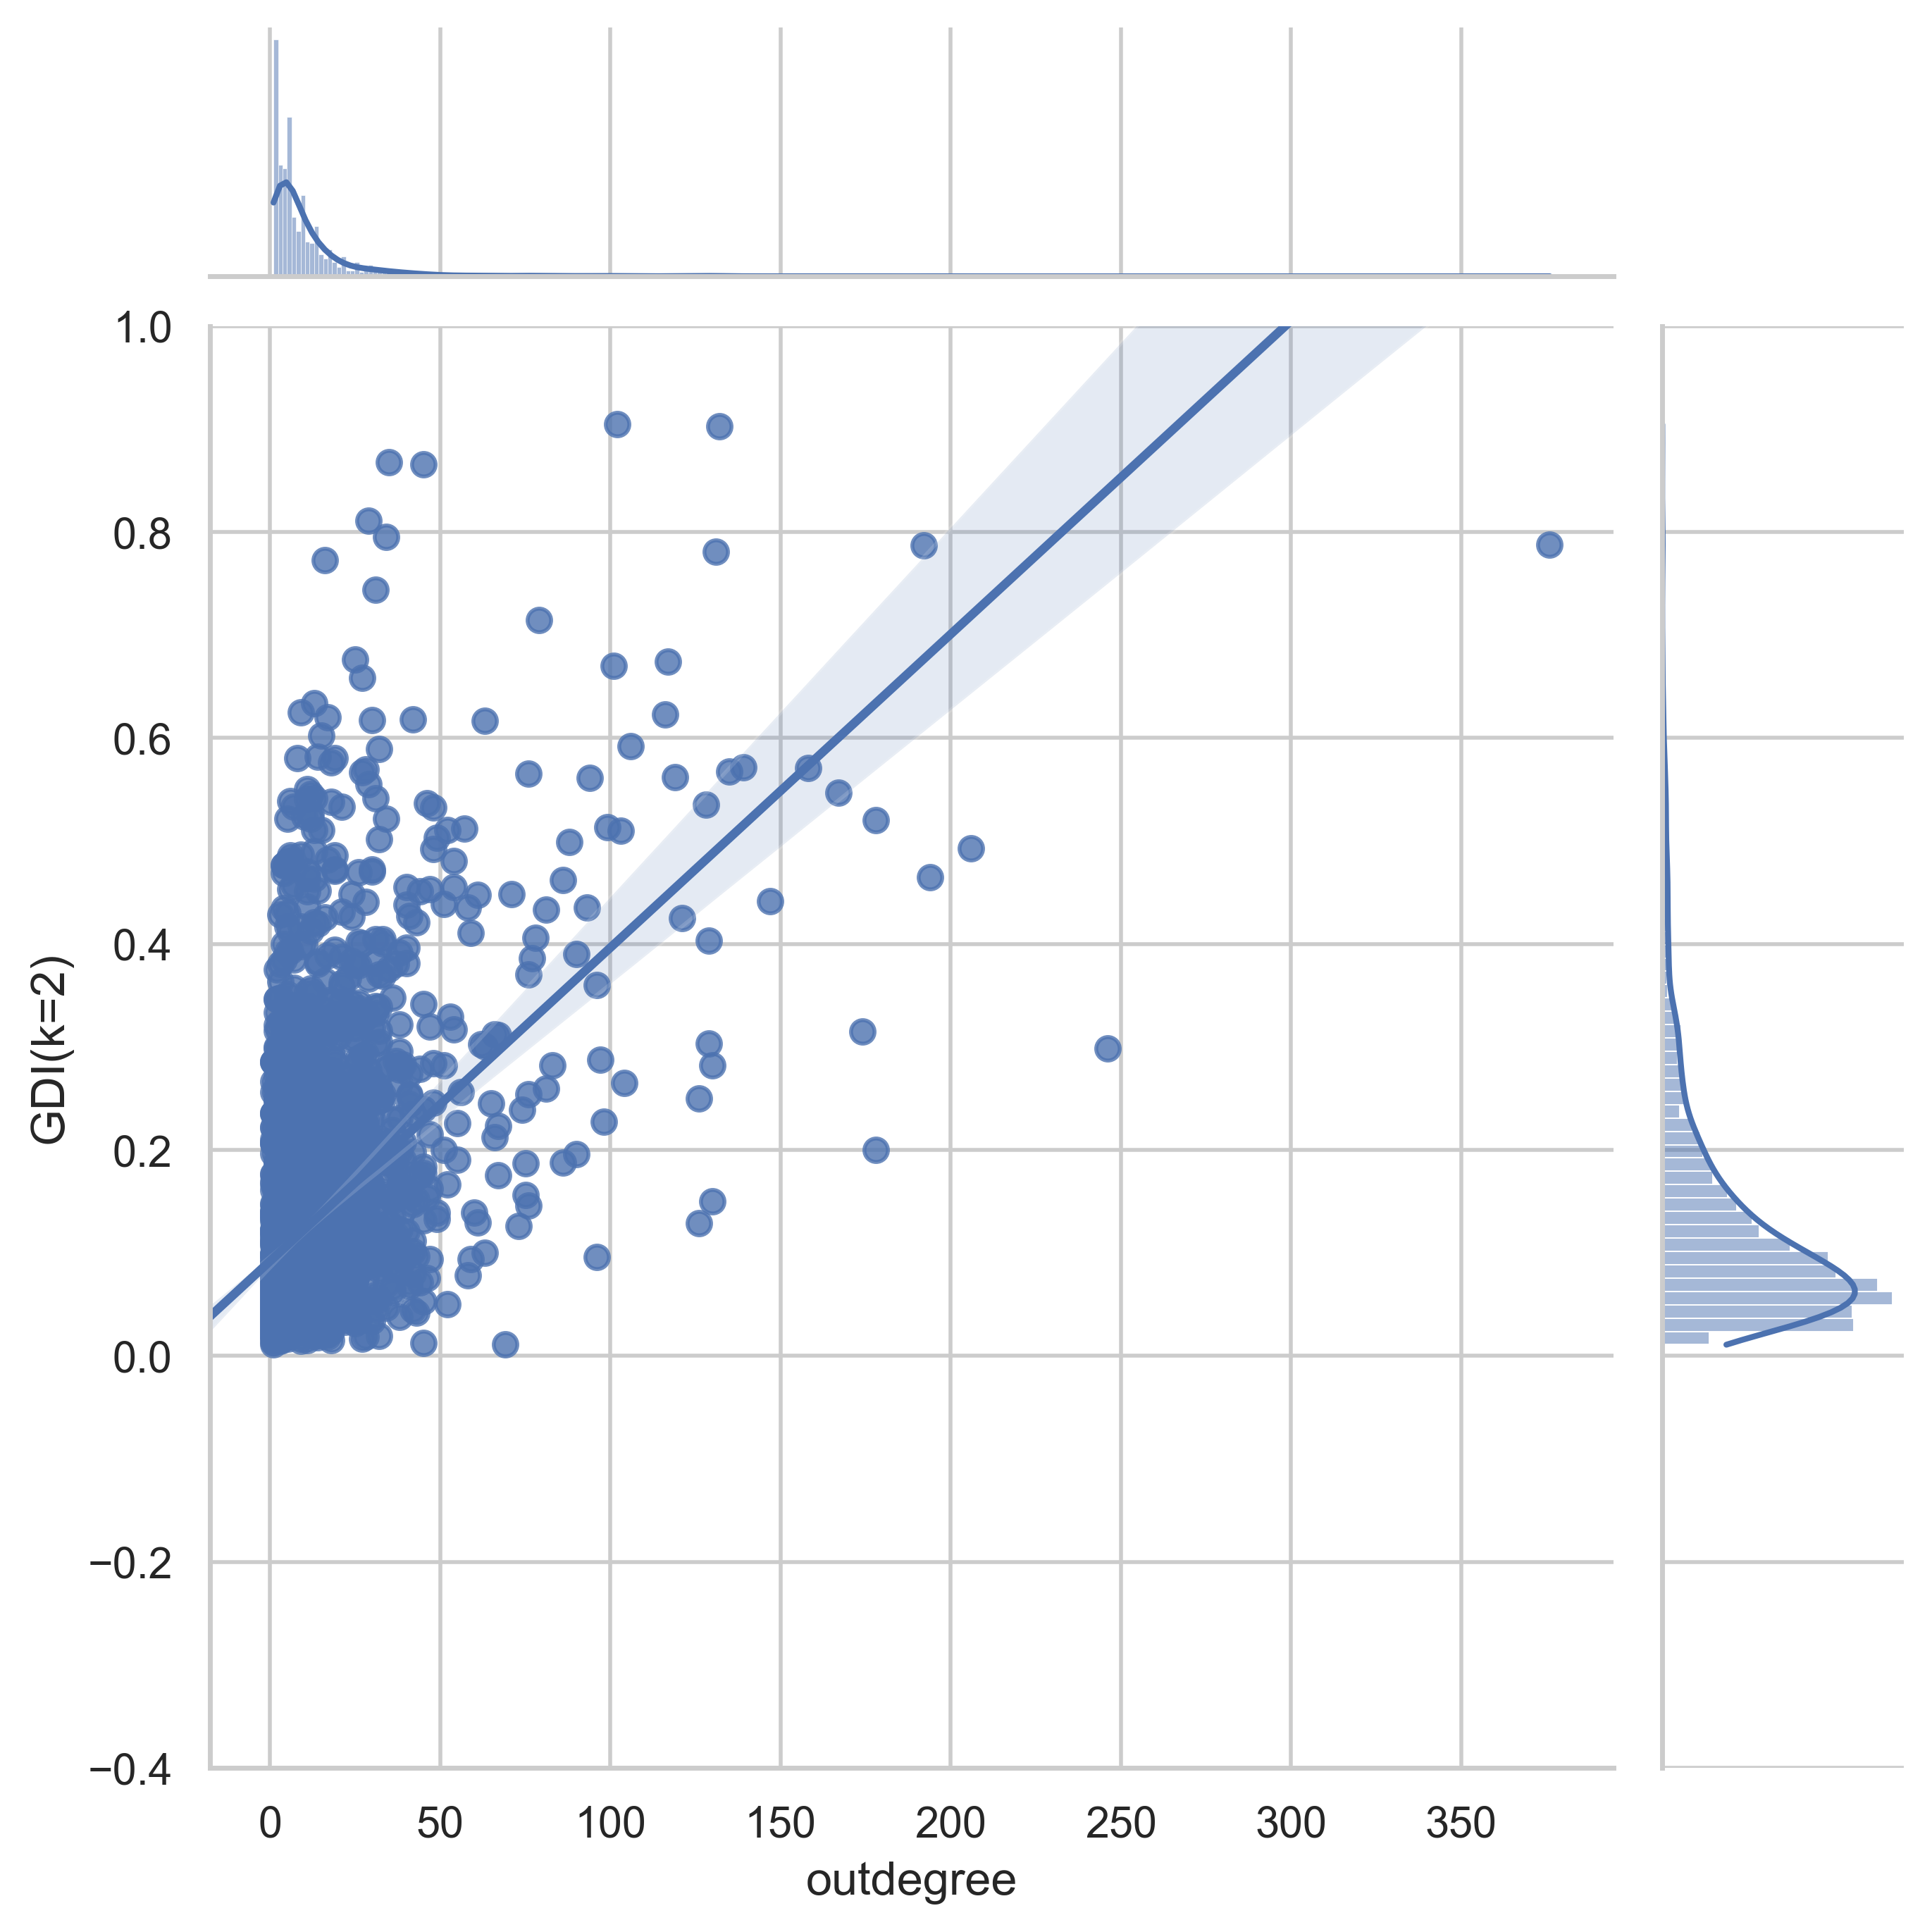

In [19]:
sns.set_theme(style="whitegrid")

g = sns.jointplot(y=r"GDI(k=2)", x="outdegree", data=df,
                  kind="reg", truncate=False,
                   ylim=(-0.4, 1),
                  color="b", height=7)

g.figure.dpi = 400

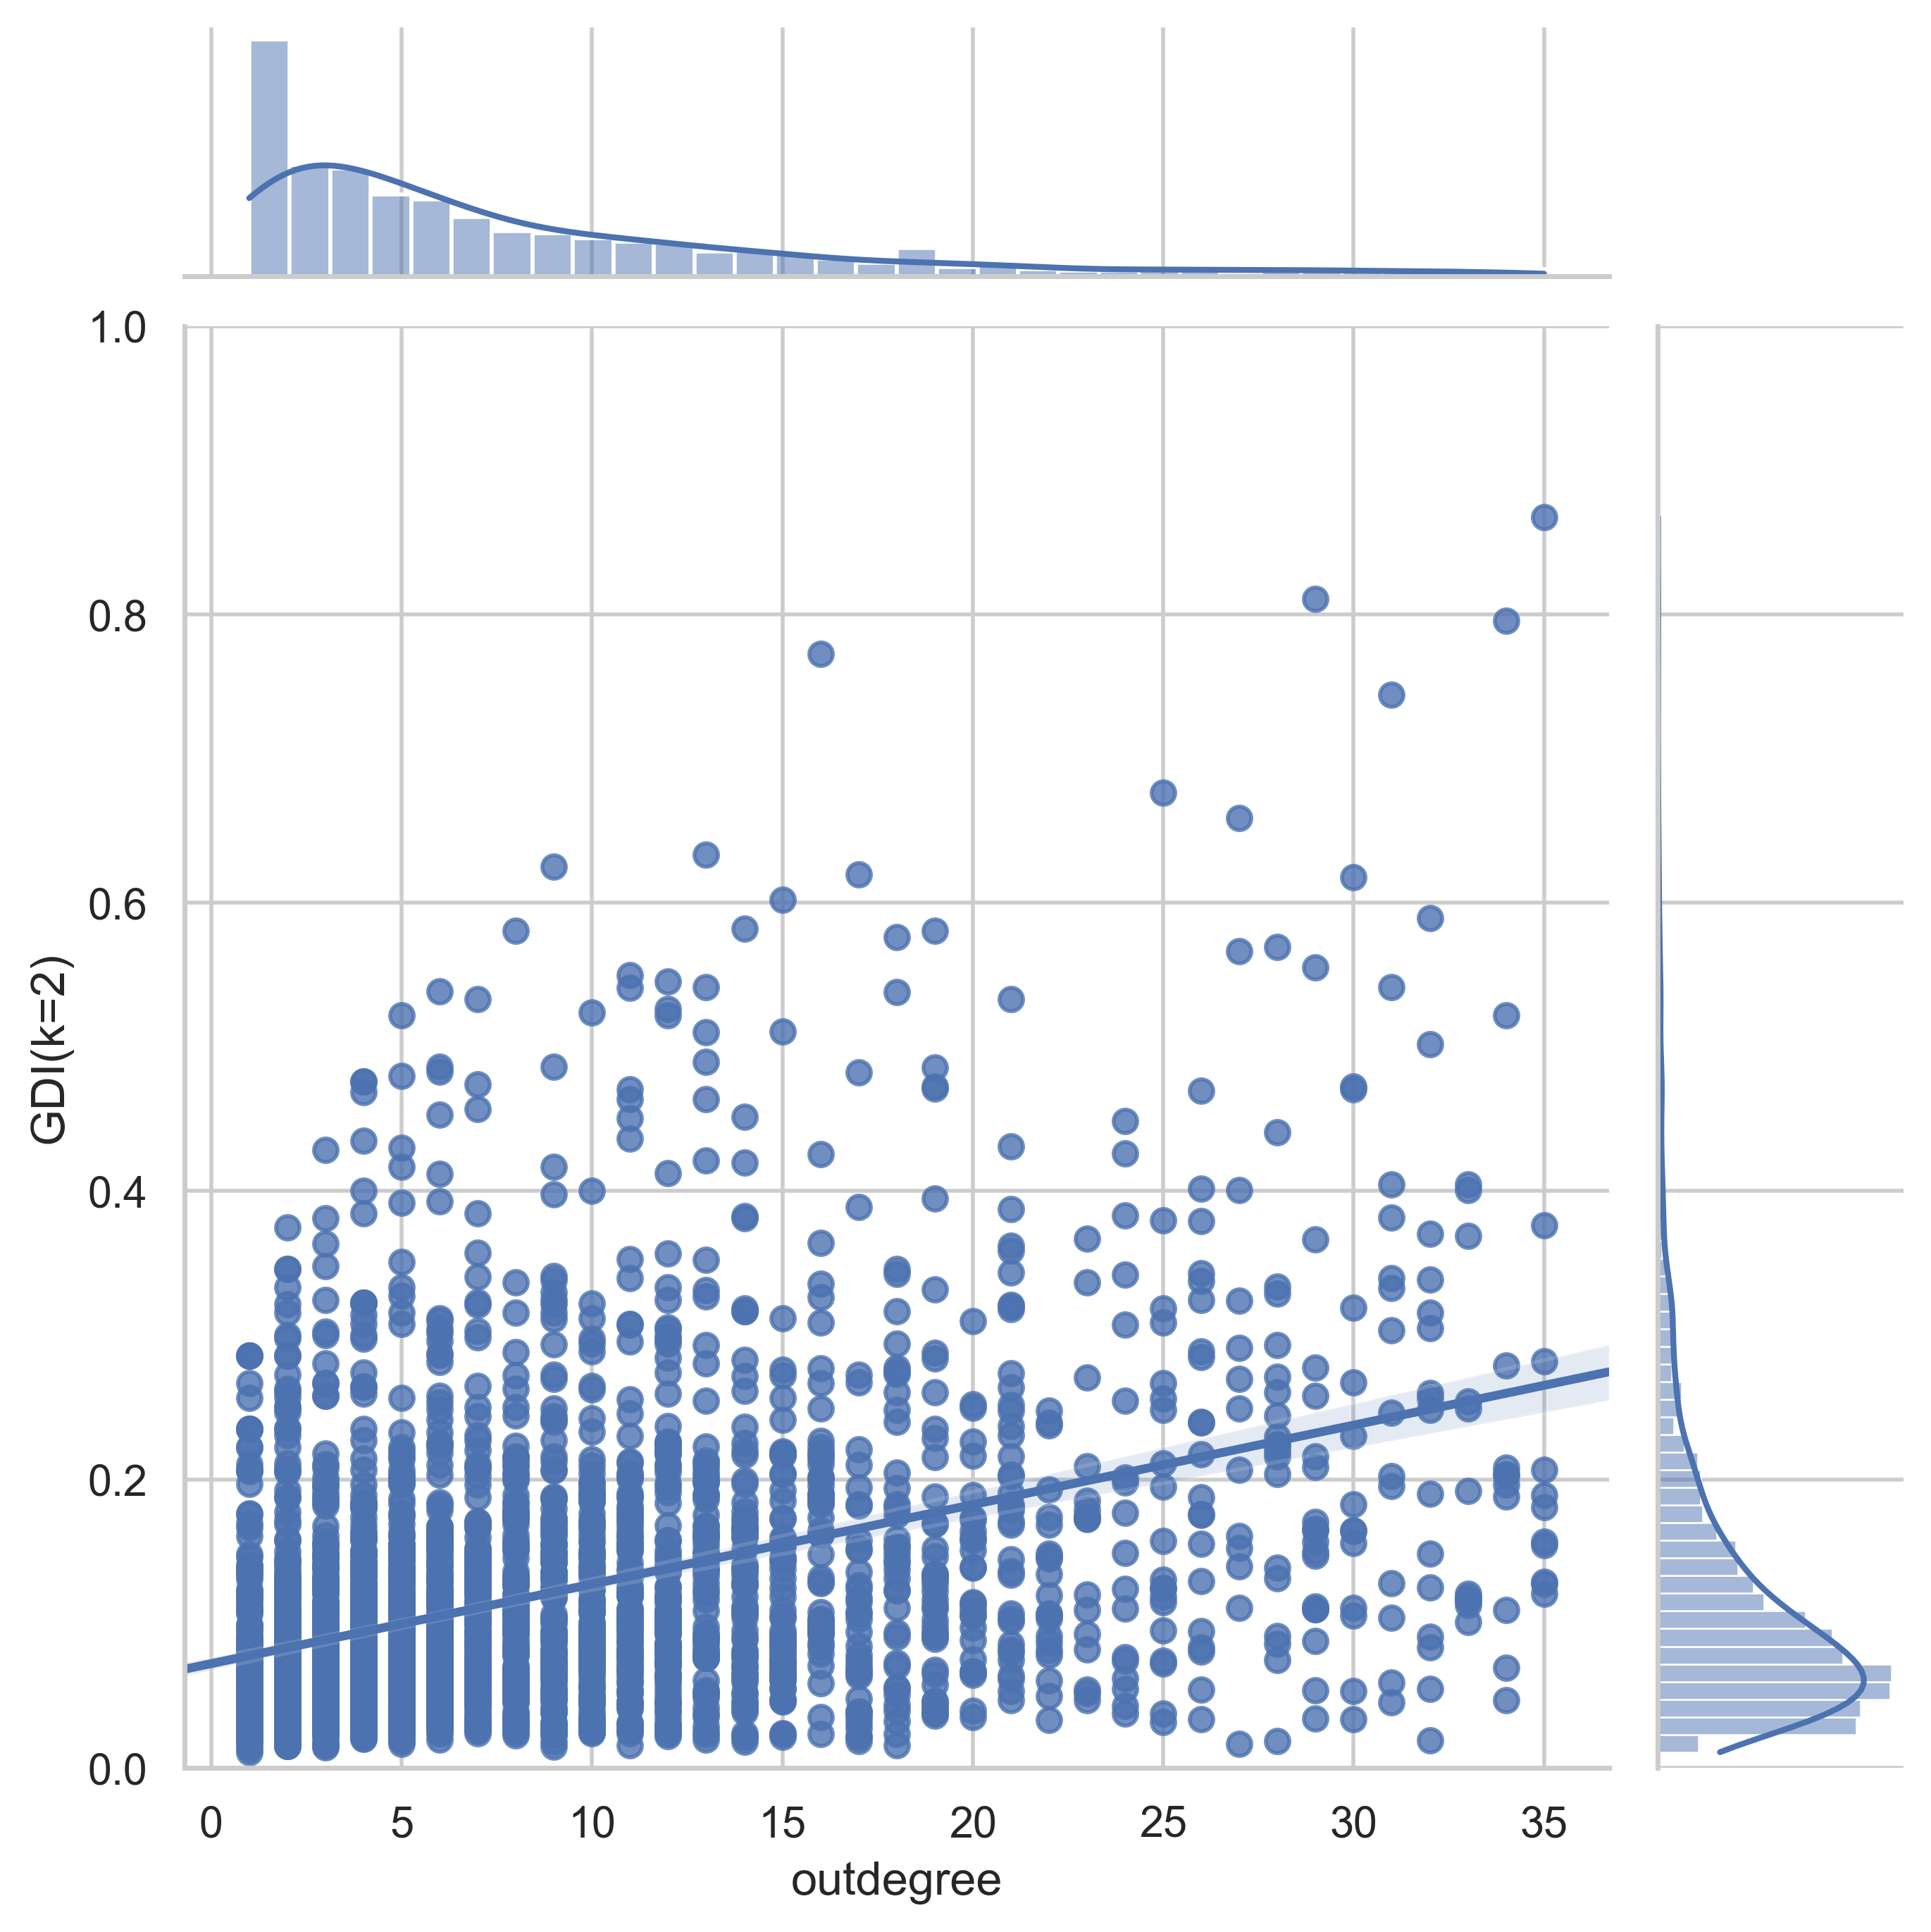

In [63]:
sns.set_theme(style="whitegrid")

g = sns.jointplot(y=r"GDI(k=2)", x="outdegree", data=df1,
                  kind="reg", truncate=False,
                   ylim=(0, 1),
                  color="b", height=7)

g.figure.dpi = 400

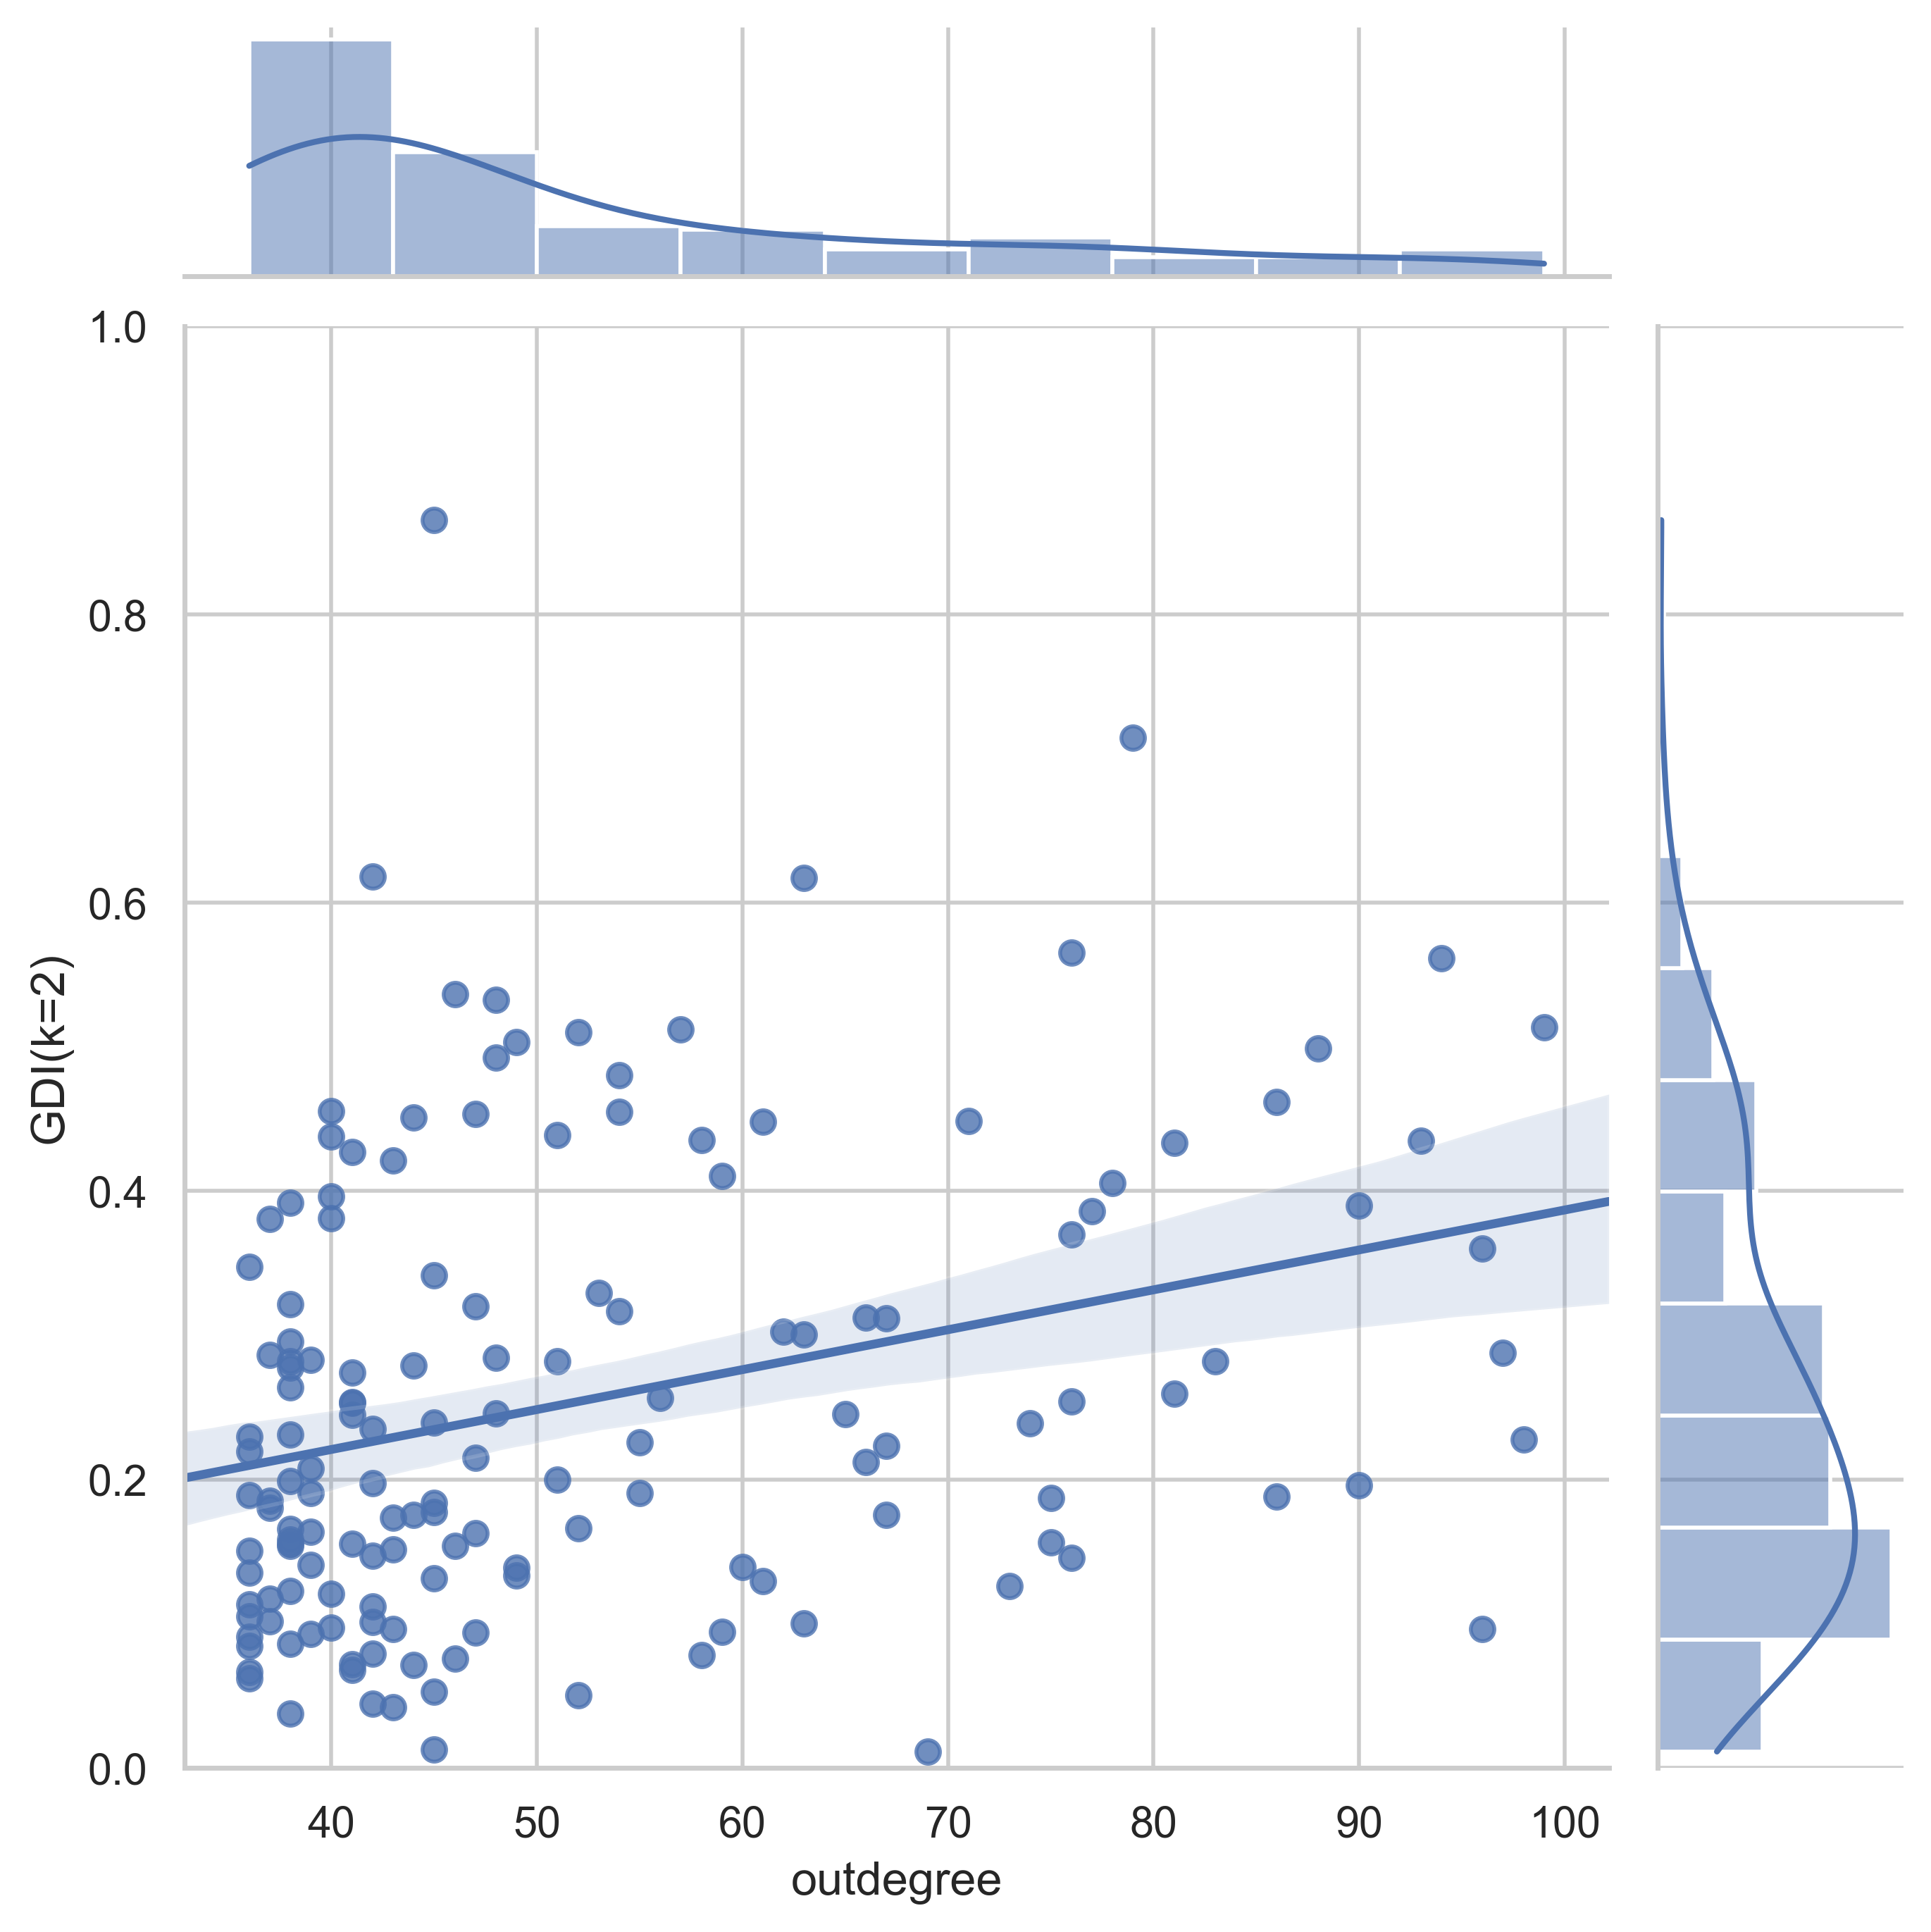

In [64]:
sns.set_theme(style="whitegrid")

g = sns.jointplot(y=r"GDI(k=2)", x="outdegree", data=df2,
                  kind="reg", truncate=False,
                   ylim=(0, 1),
                  color="b", height=7)

g.figure.dpi = 400

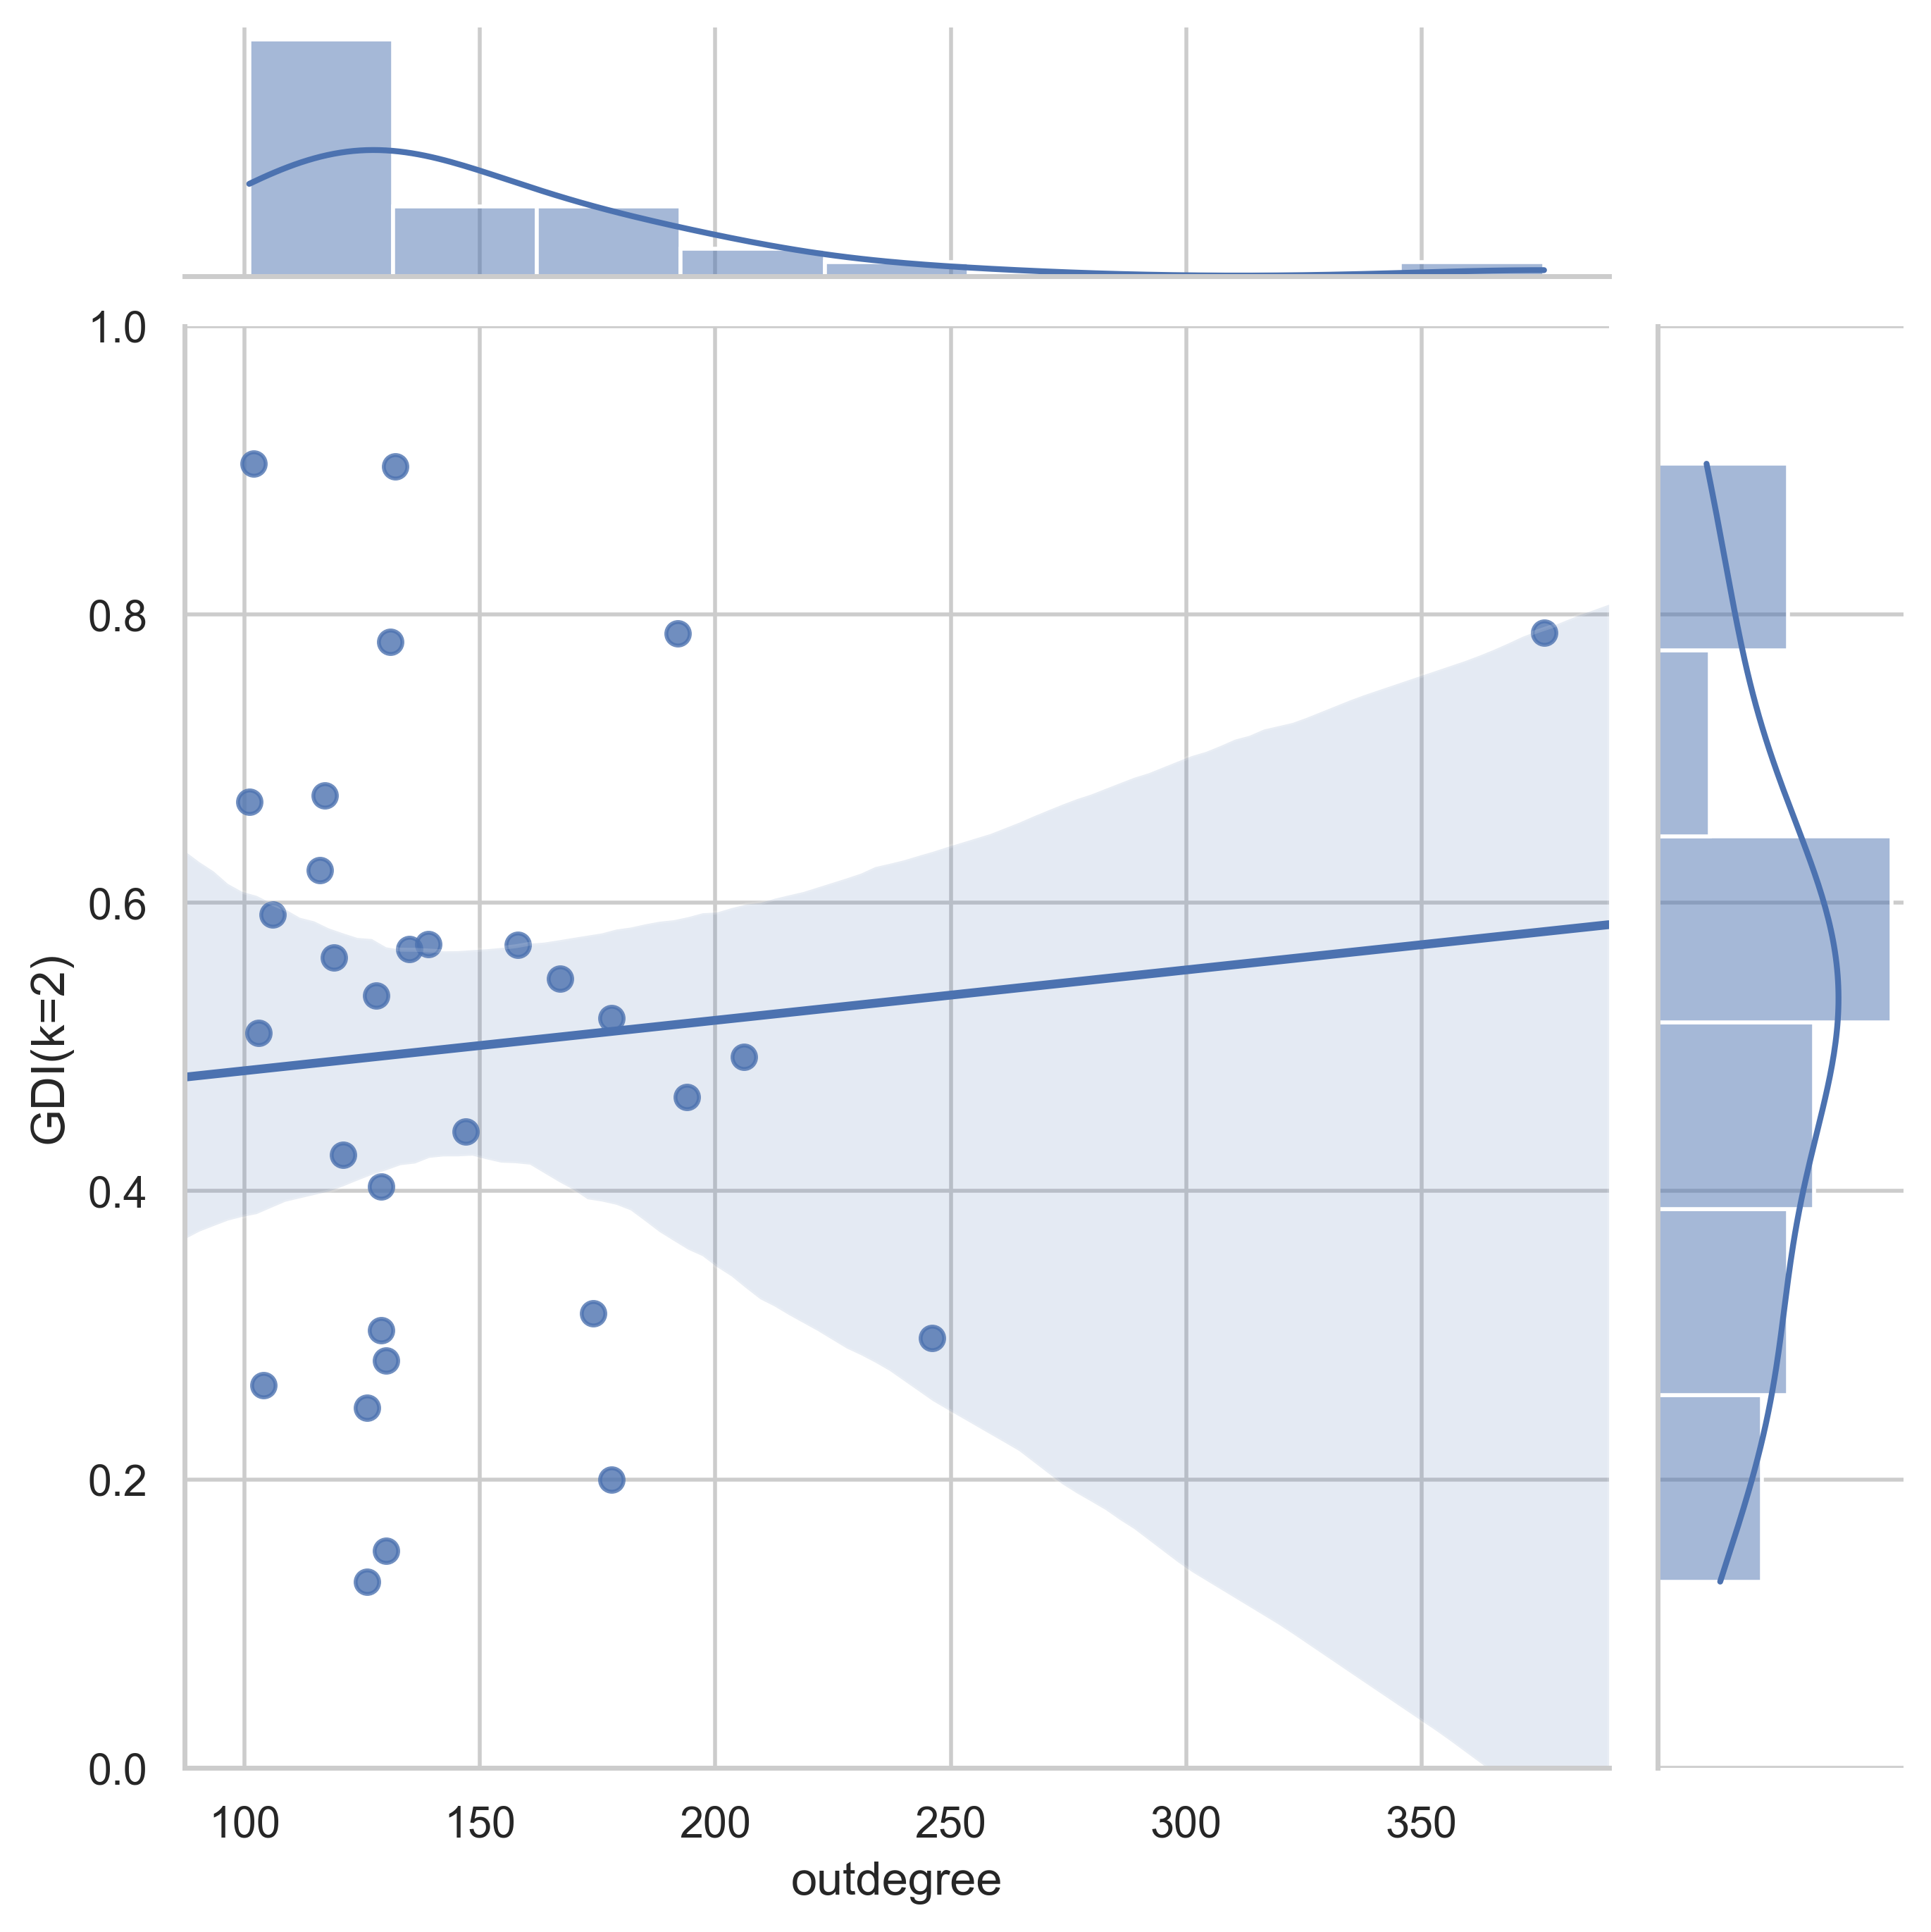

In [65]:
sns.set_theme(style="whitegrid")

g = sns.jointplot(y=r"GDI(k=2)", x="outdegree", data=df3,
                  kind="reg", truncate=False,
                   ylim=(0, 1),
                  color="b", height=7)

g.figure.dpi = 400